---
<img src="https://asset.brandfetch.io/idvDrMBg3m/idgDR62lX4.png" alt="Logo Data Rockstars" width="274" height="80">

### 🔒 Le contenu de ce document est confidentiel. 📝
_Le contenu de ce document est confidentiel et la copie ou la distribution est interdite._ 😶‍🌫️

📧 Pour toute question, veuillez nous contacter à [contact@datarockstars.ai](mailto:contact@datarockstars.ai)

---
# Le programme du notebook

**📖 Au programme**
- Cours guidé pour apprendre en s'exerçant
- Exercices avec différents niveaux

**🎁 Les takeaways**
- Accès à la plateforme
- Notebooks
- Snippets penses bêtes de code que vous pouvez garder à vie

---

🔰 Démarrez en exécutant chaque segment de code un à un et en analysant les résultats affichés. 

--- 
A vous de jouer 😎✌️

## 0. Installation de packages avec pip3

In [1]:
!pip3 install seaborn bokeh

## 1. Matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Lire les données
csv_file = "data/powerplants-eu.csv" 

# Step 3 : Lire votre dataframe
df = pd.read_csv(csv_file)

In [5]:
df.head()

,name,company,street,postcode,city,country,capacity,energy_source,technology,chp,...,type,lat,lon,eic_code,energy_source_level_1,energy_source_level_2,energy_source_level_3,additional_info,comment,source
0,Marcinelle Energie (Carsid),DIRECT ENERGIE,NaN,NaN,NaN,BE,413.0,Natural gas,Combined cycle,NaN,...,NaN,50.41396,4.40645,22WMARCIN000179H,Fossil fuels,Natural gas,NaN,NaN,NaN,https://www.elia.be/en/grid-data/power-generat...
1,Aalst Syral GT,Electrabel,NaN,NaN,NaN,BE,43.0,Natural gas,Gas turbine,Yes,...,CHP/IPP,NaN,NaN,NaN,Fossil fuels,Natural gas,NaN,NaN,NaN,https://www.elia.be/en/grid-data/power-generat...
2,Aalst Syral ST,Electrabel,NaN,NaN,NaN,BE,5.0,Natural gas,Steam turbine,Yes,...,CHP/IPP,NaN,NaN,NaN,Fossil fuels,Natural gas,NaN,NaN,NaN,https://www.elia.be/en/grid-data/power-generat...
3,AALTER TJ,Electrabel,NaN,NaN,NaN,BE,18.0,Oil,Gas turbine,NaN,...,NaN,NaN,NaN,NaN,Fossil fuels,Oil,NaN,NaN,NaN,https://www.elia.be/en/grid-data/power-generat...
4,Amercoeur 1 R TGV,Electrabel,NaN,NaN,NaN,BE,451.0,Natural gas,Combined cycle,NaN,...,NaN,50.43004,4.39518,22WAMERCO000010Y,Fossil fuels,Natural gas,NaN,NaN,NaN,https://www.elia.be/en/grid-data/power-generat...


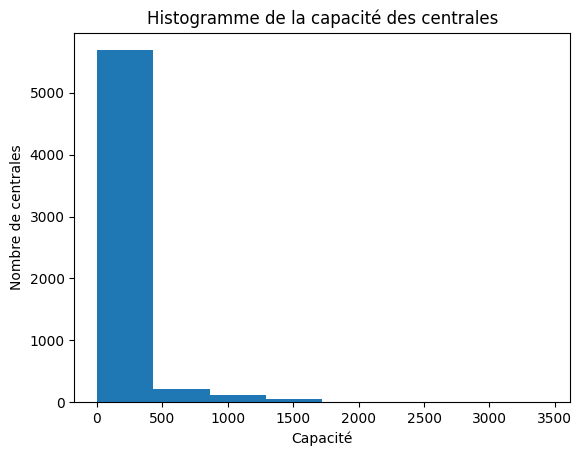

In [6]:
# 1. Histogramme de la capacité des centrales
plt.hist(df['capacity'], bins=8)
plt.xlabel('Capacité')
plt.ylabel('Nombre de centrales')
plt.title('Histogramme de la capacité des centrales')
plt.show()

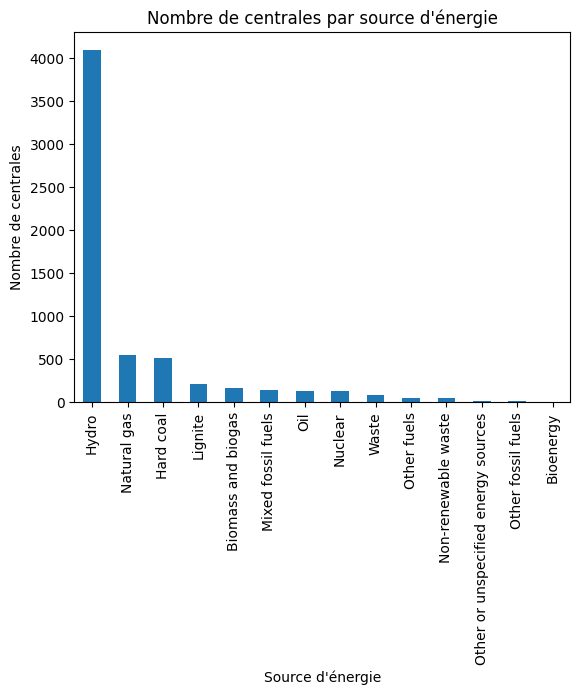

In [7]:
# 2. Diagramme à barres du nombre de centrales par source d'énergie
df['energy_source'].value_counts().plot(kind='bar')
plt.xlabel('Source d\'énergie')
plt.ylabel('Nombre de centrales')
plt.title('Nombre de centrales par source d\'énergie')
plt.show()

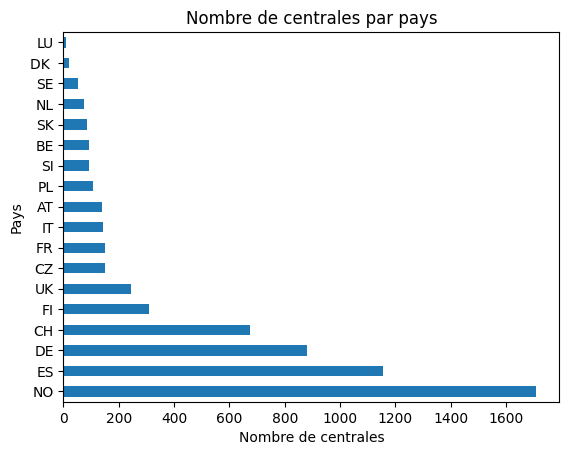

In [8]:
# 3. Diagramme à barres horizontales du nombre de centrales par pays
df['country'].value_counts().plot(kind='barh')
plt.xlabel('Nombre de centrales')
plt.ylabel('Pays')
plt.title('Nombre de centrales par pays')
plt.show()

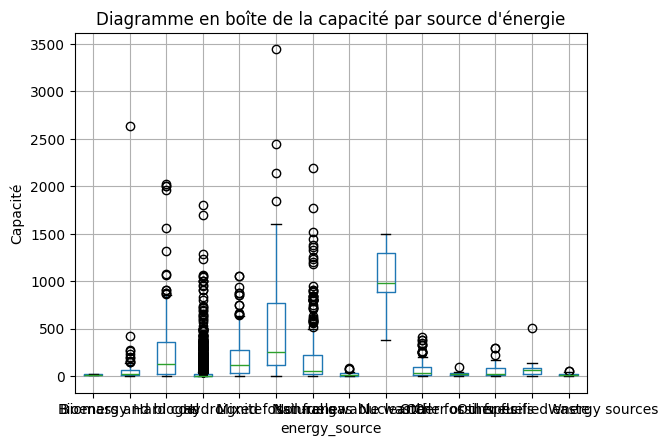

In [9]:
# 4. Diagramme en boîte de la capacité par source d'énergie
df.boxplot(column='capacity', by='energy_source')
plt.ylabel('Capacité')
plt.title('Diagramme en boîte de la capacité par source d\'énergie')
plt.suptitle('')  # Supprime le titre automatique de pandas
plt.show()

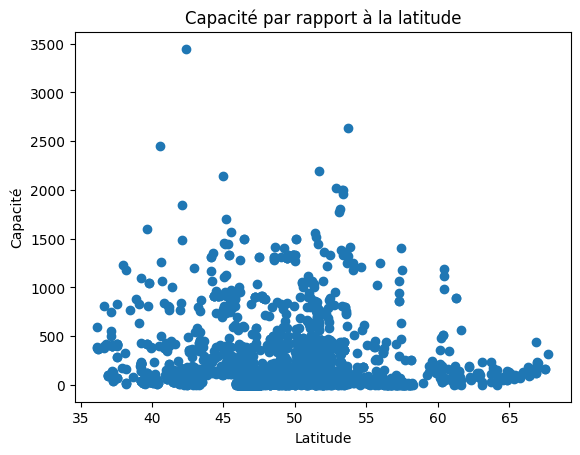

In [10]:
# 5. Scatter plot de la capacité par rapport à la latitude
plt.scatter(df['lat'], df['capacity'])
plt.xlabel('Latitude')
plt.ylabel('Capacité')
plt.title('Capacité par rapport à la latitude')
plt.show()

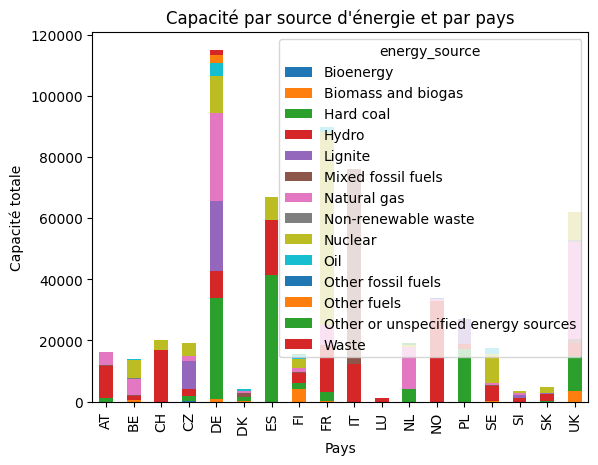

In [11]:
# 6. Diagramme à barres empilées de la capacité par source d'énergie et par pays
capacity_by_country_and_source = df.pivot_table(values='capacity', index='country', columns='energy_source', aggfunc='sum', fill_value=0)
capacity_by_country_and_source.plot(kind='bar', stacked=True)
plt.xlabel('Pays')
plt.ylabel('Capacité totale')
plt.title('Capacité par source d\'énergie et par pays')
plt.show()

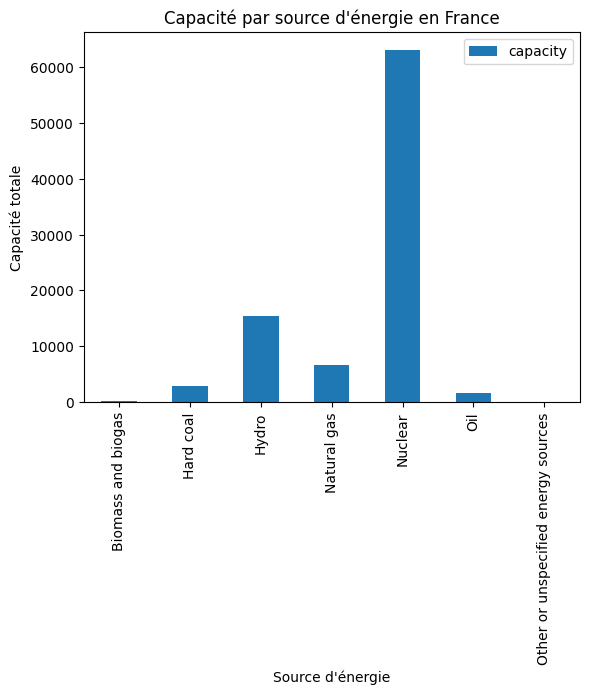

In [12]:
# Filtrer pour n'inclure que les données de la France
df_france = df[df['country'] == 'FR']

# Créer un tableau croisé dynamique de la capacité par source d'énergie en France
capacity_by_source_france = df_france.pivot_table(values='capacity', index='energy_source', aggfunc='sum', fill_value=0)

# Diagramme à barres de la capacité par source d'énergie en France
capacity_by_source_france.plot(kind='bar', stacked=True)
plt.xlabel('Source d\'énergie')
plt.ylabel('Capacité totale')
plt.title('Capacité par source d\'énergie en France')
plt.show()


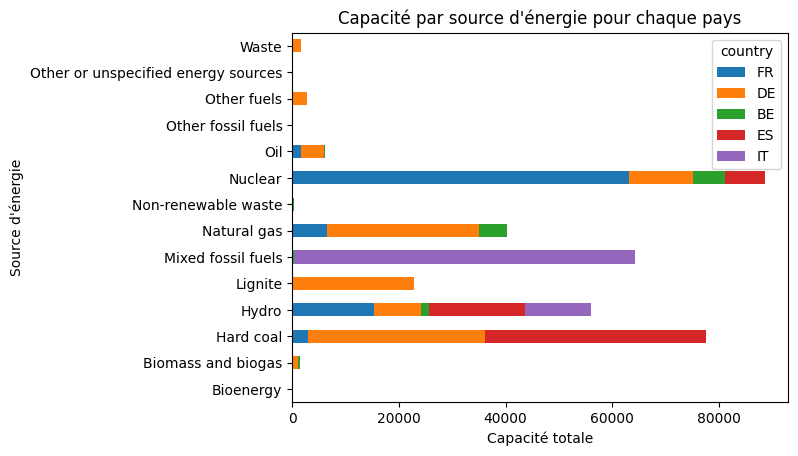

In [13]:
import matplotlib.colors as mcolors

# Créer un tableau croisé dynamique de la capacité par source d'énergie pour chaque pays
capacity_by_country_and_source = df.pivot_table(values='capacity', index='energy_source', columns='country', aggfunc='sum', fill_value=0)

# Filtrer les pays que nous voulons afficher
countries_to_display = ['FR', 'DE', 'BE', 'ES', 'IT']
capacity_by_country_and_source = capacity_by_country_and_source[countries_to_display]

# Créer une liste de couleurs pour le diagramme
colors = list(mcolors.TABLEAU_COLORS.keys())

# Diagramme à barres de la capacité par source d'énergie pour chaque pays
capacity_by_country_and_source.plot(kind='barh', stacked=True, color=colors)
plt.xlabel('Capacité totale')
plt.ylabel('Source d\'énergie')
plt.title('Capacité par source d\'énergie pour chaque pays')
plt.show()

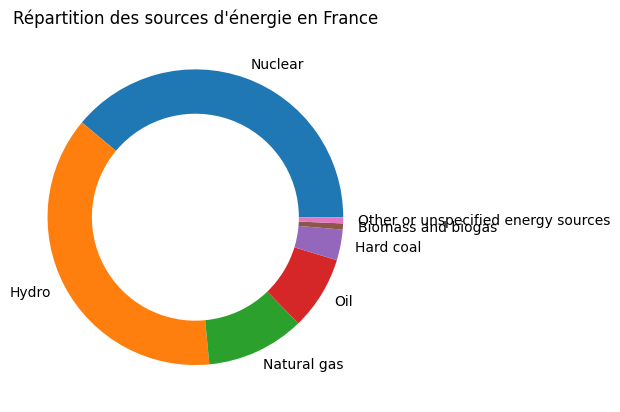

In [14]:
# Filtrer les données pour seulement la France
df_france = df[df['country'] == 'FR']

# Diagramme en anneau de la répartition des sources d'énergie en France
df_france['energy_source'].value_counts().plot(kind='pie', wedgeprops=dict(width=0.3))
plt.ylabel('')  # Supprime le label y
plt.title('Répartition des sources d\'énergie en France')
plt.show()


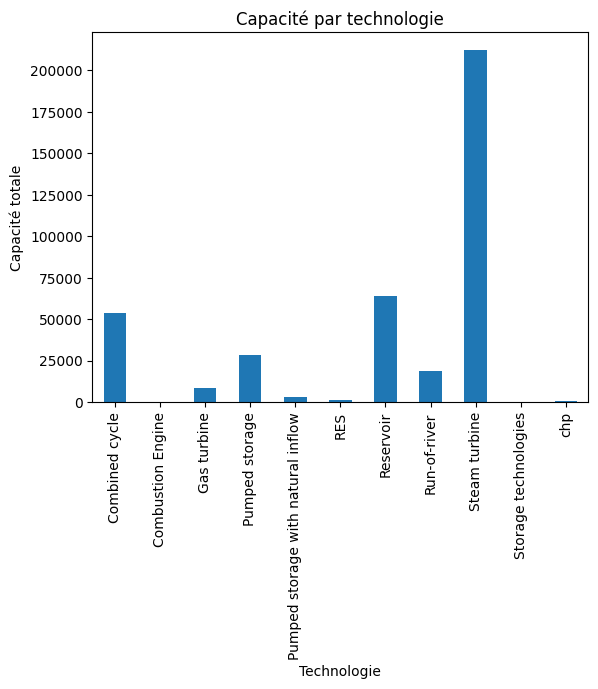

In [15]:
# 9. Diagramme de la capacité en fonction de la technologie
capacity_by_technology = df.groupby('technology')['capacity'].sum()
capacity_by_technology.plot(kind='bar')
plt.xlabel('Technologie')
plt.ylabel('Capacité totale')
plt.title('Capacité par technologie')
plt.show()

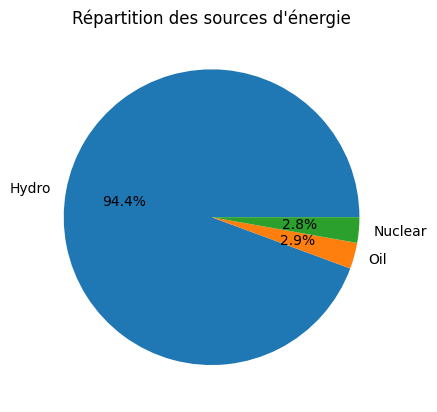

In [16]:
# Liste des sources d'énergie à conserver
keep_sources = ['Nuclear', 'Natural Gas', 'Hydro', 'Oil']

# Filtrer le DataFrame pour ne conserver que les sources d'énergie spécifiées
df_filtered = df[df['energy_source'].isin(keep_sources)]

# Diagramme à secteurs de la répartition des sources d'énergie filtrées
df_filtered['energy_source'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # Supprime le label y
plt.title('Répartition des sources d\'énergie')
plt.show()


## 2. Seaborn - Une autre librairie de data visualisation en Python 

In [17]:
import seaborn as sns

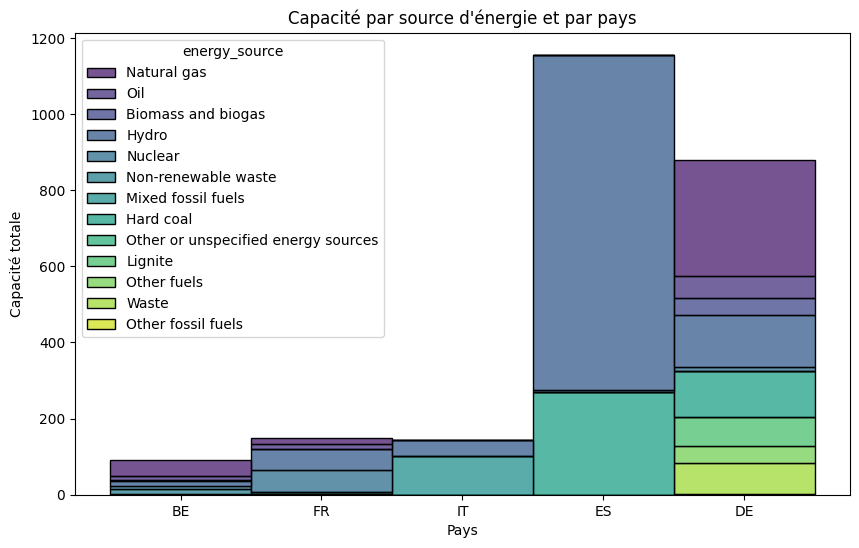

In [18]:
# Liste des pays d'intérêt
countries = ['FR', 'DE', 'BE', 'ES', 'IT']

# Filtrer le DataFrame pour ne conserver que les pays spécifiés
df_filtered = df[df['country'].isin(countries)]

# Diagramme à barres empilées
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x="country", hue="energy_source", multiple="stack", stat="count", palette='viridis')
plt.xlabel('Pays')
plt.ylabel('Capacité totale')
plt.title('Capacité par source d\'énergie et par pays')
plt.show()


## 3. Bokeh - Encore une autre alternative... (pour aller plus loin)

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Category20
from bokeh.models import NumeralTickFormatter, WheelZoomTool, FixedTicker

In [ ]:
output_notebook()

# Supprimer les valeurs NaN dans la colonne "energy_source"
df_filtered = df.dropna(subset=['energy_source'])

# Création de la palette de couleurs
colors = Category20[5]

# Personnalisation des options de zoom
wheel_zoom_tool = WheelZoomTool(zoom_on_axis=False, dimensions="width")

# Graphique à barres
p1 = figure(x_range=df_filtered['energy_source'].unique(), height=500, title="Capacité par source d'énergie (Barres)")
p1.vbar(x='energy_source', top='capacity', width=0.5, color=colors[1], source=df_filtered)
p1.xaxis.axis_label = "Source d'énergie"
p1.yaxis.axis_label = "Capacité totale"

# Personnalisation des axes
p1.xaxis.major_label_orientation = "vertical"
p1.xaxis.axis_line_width = 2
p1.yaxis.axis_line_width = 2
p1.yaxis.ticker = FixedTicker(ticks=[0, 1000, 2000, 3000])  # Définir les valeurs de l'axe y

show(p1)